In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import cv2
width, height= 224, 224
img = cv2.imread('/content/drive/MyDrive/project 10/train/Jeans (men)/folder10.jpg')
img_resized = cv2.resize(img,(width, height))

In [16]:
img_resized.shape

(224, 224, 3)

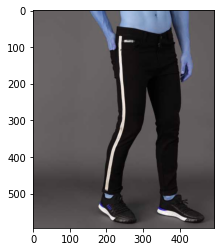

In [17]:
plt.imshow(img)

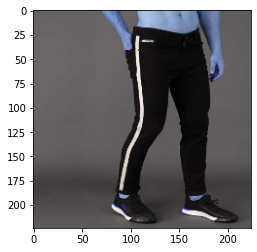

In [18]:
plt.imshow(img_resized)

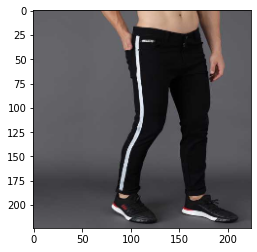

In [19]:
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

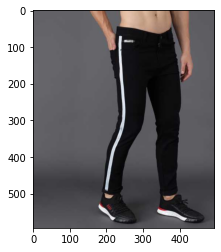

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [22]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
training_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project 10/train',
                                                 target_size = (width, height),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 900 images belonging to 3 classes.


In [25]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project 10/test',
                                            target_size = (width, height),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 42 images belonging to 3 classes.


In [26]:
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/project 10/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [27]:
folders

['/content/drive/MyDrive/project 10/train/Sarees (women)',
 '/content/drive/MyDrive/project 10/train/Trousers (men)',
 '/content/drive/MyDrive/project 10/train/Jeans (men)']

In [28]:
# fit the model
r = model.fit_generator( training_set,validation_data=test_set,epochs=2)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
29/29 [==============================] - 471s 16s/step - loss: 0.4936 - accuracy: 0.8267 - val_loss: 0.0565 - val_accuracy: 0.9762
Epoch 2/2
29/29 [==============================] - 460s 16s/step - loss: 0.0386 - accuracy: 0.9967 - val_loss: 0.0213 - val_accuracy: 1.0000


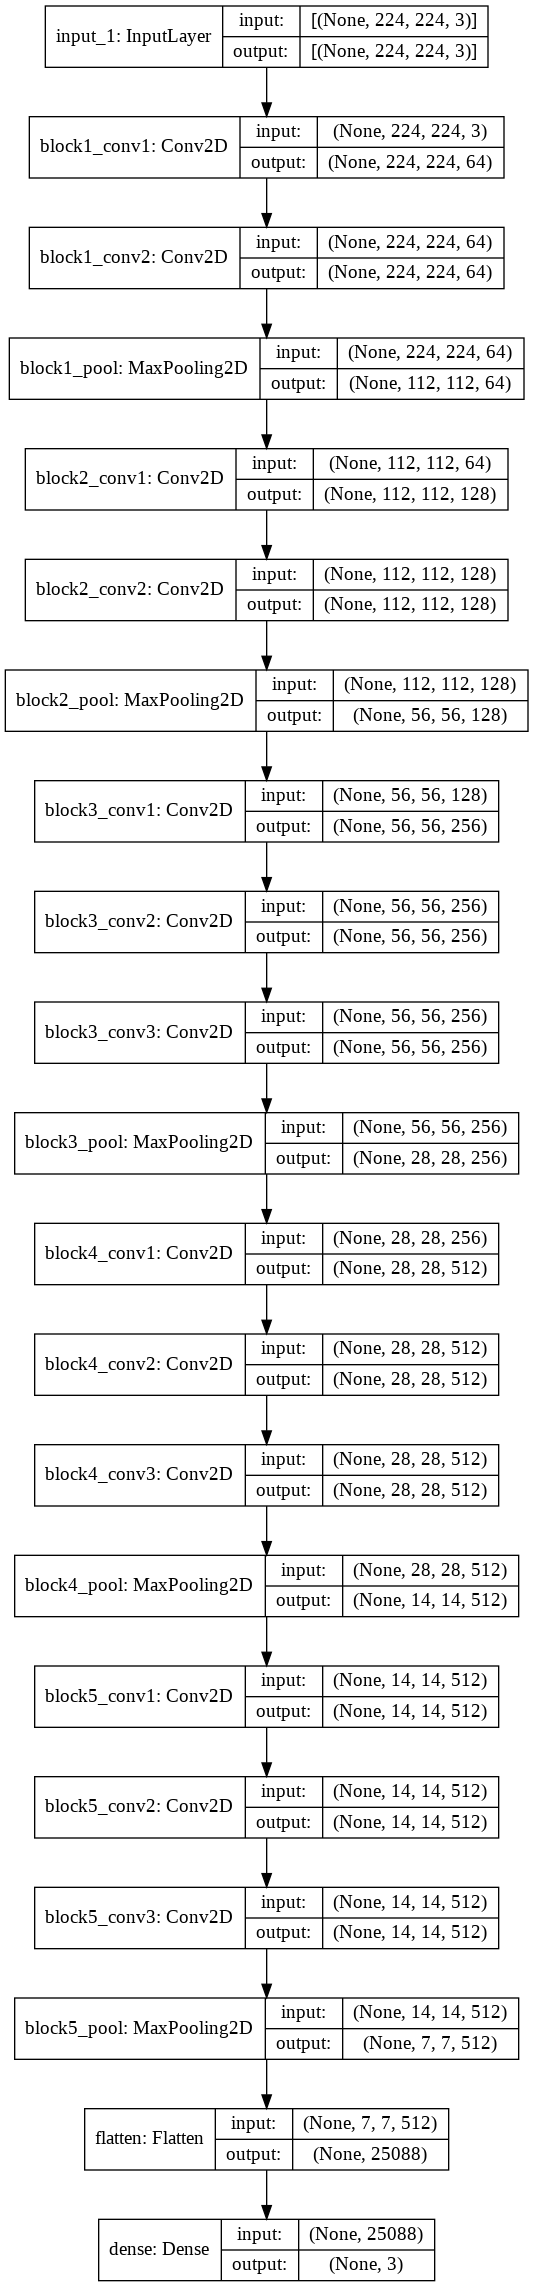

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True, show_layer_names=True)